Changelog
- 27-11-2024: changed cplu to cqdm in function qdm_to_global (matrix entry (row:1, column:2))
- 28-11-2024: changed magmom to magmom[:, :3] after rotate function and rearranged cells
- 06-06-2025: better explained and updated rotation function; added zijderveld diagram; changed closed/open symbols stereoplots with negative/positive inclination
- 16-06-2025: changed Matching CT explanation with macroplayer; changed example to LP5.5B

# MMT Protocol
### version nov-2024

Welcome to this MMT protocol that will guide you through all steps between data acquisition and magnetic moments.
The protocol knows 5 steps:
1) Checking libraries
2) Coregistration of CT and QDM data
3) Selecting sample area to invert
4) Inversion
5) Plotting

## 1. Checking libraries
Executing this protocol is only successful if you have installed all required libraries below. Check now if you can execute the cell below (shift enter) without error messages. Otherwise, you will need to install the required packages.

In [1]:
import numpy as np
from pathlib import Path
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.patches as patches
import matplotlib as mpl
import pandas as pd

from mmt_multipole_inversion import plot_tools
import mmt_multipole_inversion.magnetic_sample as msp
import mmt_multipole_inversion.multipole_inversion as minv

path = Path().absolute()
datapath = path / 'data'
imagepath = path / 'images'

/home/out/miniconda3/envs/mmt/lib/python3.11/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


Before continuing, also set your subpath. That is the location where you have stored all your files which you would like to use in this workflow.

In [2]:
subpaths = ['NRM', '5mT', '10mT', '15mT', '35mT', '60mT', '100mT']

To continue this workflow, you need at least the following 3 files for your sample:
1) qdm scan in .npy format
2) LED photo of your sample, made by the QDM in either .csv/.txt/.npy format
3) corresponding CT data, with already extracted iron-oxides.

Place these files in a location that is easily reachable.

If you do not know how to extract iron-oxides with DragonFly, we have written a tutorial on that, which you can access by [clicking here](https://www.overleaf.com/read/nkrrcqrbzjkx#0c36ca)

-> match_sessieV2.ORSSession contains an example of how MicroCT data and QDM data is mapped on one another

## 2a. Coregistration of CT and QDM data using macro

As of the 20th of May 2025, we now have a Macro in Dragonfly that makes life easier. The figure below shows how to find the macro player and run our created macro. In case the macro is lost, we have attached it to the workflow document (see [the workflow document](https://www.overleaf.com/read/nkrrcqrbzjkx#0c36ca); under 'Codes' $->$ 'DragonFly' $->$ 'MacroDragonfly.py'. You can load that into the DragonFly macro player if the macro is not there anymore. The Macro player contains all the steps described under option 2b.

Before you start the macro, you should have a MultiROI with the selected magnetic carriers ready. Furthermore, have your qdm data ready following a logical folder structure. Select the $||>$-button at the bottom, a screen opens, asking you to select where you have placed your qdm bz and led map (note that we mean the .npy files!). After selecting that folder, the program will load the data, set correct pixel space, and move the LED 18 micron upwards wrt the Bz map to match. Then the program will ask you to map the CT to the LED before continuing. See [workflow](https://www.overleaf.com/read/nkrrcqrbzjkx#0c36ca) section 6.4.3 on how to match the CT data to the LED image. After you are happy with your result (verify that you mapped the correct slice and not the bottom one!), you can click on the $||>$-button at the bottom of the macro-player again. It will now save the data and store a grain\_loc.csv file in the same map you selected at the beginning. If you want, you can continue to another dataset with this macroplayer, but be sure to first delete the old BZ and LED map.

![Use macro player](images/macrodragonfly.png 'Open and use the macro player')
Figure showing how to open the Macro player and run the macro 'LoadQDM+SaveCT'. 1. Go to Utilies and select Macro Player. 2. Select the macro 'LoadQDM+SaveCT' from the list; if not available click on import file (see *) and upload the Macrofile included to this document. 3. Run the macro by clicking the $||>$-button. You will have to click this button again when you have finished matching the CT to the LED data.

Iterate this procedure for all data you have (e.g. a demag sequence)

## 2b. Coregistration of CT and QDM data using manual approach

### a) Loading data
First you have to load your MicroCT data, then you can load the qdm scan and LED photo:
1) Click on Developer
2) Click on Script Runner
![Open the script runner](images/DF1.png 'Open the script runner')
3) Click on LED script (either csv or .npy)
4) Change path and (if necessary) name, and run the script by clicking &#9658; (your dataset should appear now to the top right side of the screen)
![Change path and click play](images/DF2.png 'Change path and click play')
5) Do the same for the QDM scan by choosing 'load numpy dataset Bz'
6) Again, change path and name (if necessary) and click &#9658;

Note: the program will give an error if your path or filename are incorrect

### b) Set-up parameters
After loading the data, we will proceed to setting some basic parameters and match the data.
1) right-click on the LED and select image properties; change the following:
- Set spacing x and y (in mm) to 0,0012
- Set z-spacing to 10
- Hit apply

2) click on 'Advanced Properties', and change 'Position in space' as follows
- Set Y to -0,018 (the LED of the QDM scan is moved 15 pixels with respect to the actual Bz scan)
- Set Z to -5
- Hit apply
![setting parameters LED](images/DF3.png 'setting parameters LED')

3) right-click on the Bz and select image properties; change the following:
- Set spacing x and y (in mm) to 0,0012
- Set z-spacing to 10
- Hit apply

4) click on 'Advanced Properties', and change 'Position in space' as follows
- Set Z to -5
- Hit apply

5) make the Bz dataset visible by clicking on the crossed-out &#128065;-icon.
6) change the colorscale to magnetic fire (or anything else) by clicking on lookup table within the 'window leveling'; set range appropriately.
![match bz to led and set color of Bz](images/DF4.png 'Notice the match of LED and Bz')
If you make both datasets visible (click &#128065;-icon), you will notice that the LED is sticking out below the Bz-scan

Note: verify that LED and Bz actually match by clicking the &#128065;-icon repeatedly

### c) Match data
With all data ready, we will match CT (grains) to the LED of the QDM scan:
1) Make the LED and the grains visible
2) **Very important: only move the grains, do not move the LED or QDM scan in the next steps**
3) Make the grains visible and select them (if you want to move multiple layers, hold ctrl and select layers)
4) While having selected the layer(s) with grains, click on the displace tool under 'translat/rotate'
5) Rotate (by moving the &#10226;-icon) and translate (by moving the arrows) your data until you have obtained a good match with the QDM LED scan
![match grains to led by rotation and translation](images/DF5.png 'match grains to led by rotation and translation')

Note: you can change the opacity of all layers, by selecting that layer, make it visible, and change opacity under 'opacity mapping'

### d) Save grains
1) Right-click on the layer containing all grains
2) Select 'connected components'
3) Select 'Analysis'
4) Click on the &#128736;-icon and select all requested parameters (hit ok afterwards)
5) Click on 'select all' and 'export to' csv
![Saving grains to csv](images/DF6.png 'saving grains to csv')

Iterate this process for all measurements you have (e.g. a Demag sequence)

## 3. Selecting sample area to invert
With the data matched, we can now proceed to obtaining some magnetic moments. Depending on where you want to do your calculations, you might have to shrinken your sample area if your computer cannot handle it.

1. We load our grains and magnetic field of the first step (```subpath = subpaths[0]```) here, throw away any grain that consists of less than 10 voxels, and correct for the z-coordinate of all grains (grains should have negative z; our example sample is a bottom sample with largest z being closest to the QDM sensor).
- **very important**: make sure to understand the z-axis of your sample. Appointing incorrect depths result into significant errors in magnetic moments which cannot always be immediately detected!

In [13]:
# magnetic field
sample_nr = 0
subpath = subpaths[sample_nr]

qdm_01 = np.load(next(Path(datapath / subpath).glob('1bin_Bz_muT*.npy')))
# grains
iron_oxides = pd.read_csv(next(Path(datapath / subpath).glob('grain*.csv')),
                          delimiter=';', encoding='latin1'
                         ).dropna(how='all', axis=1)[['Label Index', 'Voxel count', 'Volume (mmÂ³)', 'Center Of Mass X (mm)', 'Center Of Mass Y (mm)', 'Center Of Mass Z (mm)']]

# the column names match the selected parameters
# possibly you will have to change this
iron_oxides.columns = ['nr', 'voxel', 'vol_mm', 'x', 'y', 'z']

# throw away smaller than 10 voxels
cond = (iron_oxides['voxel'] >= 10)
filt_oxides = iron_oxides.where(cond).dropna(how='all')
print(f'{len(filt_oxides)}/{len(iron_oxides)} ({round(len(filt_oxides)/len(iron_oxides)*100)}%) grains are 10 voxels or larger')

option = 2# put correct number here, should be 2 in this case
# use this option if initial positive z-axis is pointing from top to bottom of sample (i.e. top sample)
# with top we mean closest to QDM-measurement plane
if option == 1:
    filt_oxides[['z']] -= min(filt_oxides.z)
    filt_oxides[['z']] *= -1

# use this option if initial positive z-axis is pointing from bottom to top of sample (i.e. bottom sample)
# with top we mean closest to QDM-measurement plane
if option == 2:
    filt_oxides[['z']] -= max(filt_oxides.z)

filt_oxides.head(10)

4910/5346 (92%) grains are 10 voxels or larger


,nr,voxel,vol_mm,x,y,z
436,437.0,10.0,6.177438e-10,1.582317,1.223385,-0.007301
437,438.0,10.0,6.177438e-10,1.282898,0.794488,-0.020912
438,439.0,10.0,6.177438e-10,0.939289,0.452480,-0.025768
439,440.0,10.0,6.177438e-10,1.627614,0.413680,-0.021111
440,441.0,10.0,6.177438e-10,0.915989,0.444841,-0.015539
441,442.0,10.0,6.177438e-10,1.387555,1.289318,-0.013947
442,443.0,10.0,6.177438e-10,1.074146,0.242118,-0.009331
443,444.0,10.0,6.177438e-10,1.401729,0.288801,-0.029310
444,445.0,10.0,6.177438e-10,1.058103,0.422665,-0.024335
445,446.0,10.0,6.177438e-10,0.909731,0.307023,-0.029190


2) Next up is imaging the complete area and drawing boundaries around the area we want to invert. These boundaries are saved for future references

Indices of the selected area are [208:1159, 650:1421]
This corresponds to the following physical dimensions; 
from y=249.6um to y=1389.6um and from x=780.0um to x=1704.0um


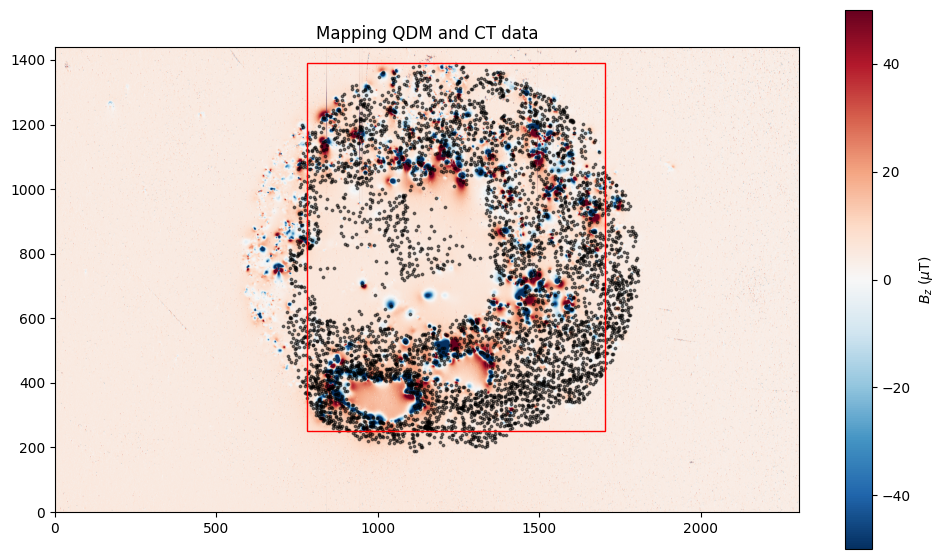

In [14]:
#### set parameters ####
# sampling interval in micrometers
dqdm = 1.2
# set minimum y-value
y_ini = 250
# set minimum x-value
x_ini = 780
# set amount of pixels in the y-direction
y_pix = 950
# set amount of pixels in the y-direction
x_pix = 770
#### end of settings ####
np.savetxt(path / subpath / 'domainbounds.txt', np.array([y_ini, x_ini, y_pix, x_pix]))

# calculate area parameters
y0 = round(y_ini / dqdm) * dqdm
x0 = round(x_ini / dqdm) * dqdm
y1 = round((y0 + y_pix * dqdm) / dqdm) * dqdm
x1 = round((x0 + x_pix * dqdm) / dqdm) * dqdm

print('Indices of the selected area are '
      f'[{round(y0/dqdm)}:{round(y1/dqdm)+1}, {round(x0/dqdm)}:{round(x1/dqdm)+1}]')
print('This corresponds to the following physical dimensions; \n'
      f'from y={y0}um to y={y1}um and from x={x0}um to x={x1}um')

# we select some grains to make plotting 
select = filt_oxides.where(iron_oxides.z > -0.05).dropna()

# start plotting of area
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Mapping QDM and CT data')
# you could change vmin and vmax to change colorscale
c = ax.imshow(qdm_01, cmap='RdBu_r', vmin=-50, vmax=50, extent=[0, dqdm * len(qdm_01[0]), 0, dqdm * len(qdm_01)], origin='lower')
ax.scatter(select.x * 1e3, select.y * 1e3, color='black', alpha=0.5, s=3)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

fig.colorbar(c, label='$B_z$ ($\mu$T)')
plt.show()

all grains are depicted in black, our selected area is red.

3) Let's zoom in on our area to see it a bit better

The shape of our selected area is (951, 771)


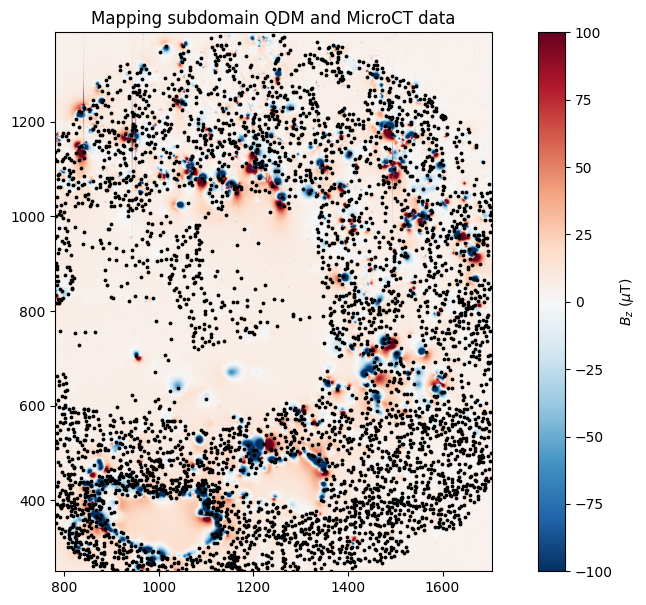

In [16]:
sub_qdm_01 = qdm_01[round(y0/dqdm):round(y1/dqdm)+1,
                    round(x0/dqdm):round(x1/dqdm)+1]
print(f'The shape of our selected area is {sub_qdm_01.shape}')

# only select particles that are within image
use_grains = filt_oxides.where((filt_oxides.y > (y0)*1e-3)
                               & (filt_oxides.y < (y1)*1e-3)
                               & (filt_oxides.x > (x0)*1e-3)
                               & (filt_oxides.x < (x1)*1e-3)).dropna()

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Mapping subdomain QDM and MicroCT data')
c = ax.imshow(sub_qdm_01, cmap='RdBu_r', vmin=-100, vmax=100, extent=[x0, x1, y0, y1], origin='lower')
ax.scatter(use_grains.x * 1e3, use_grains.y * 1e3, color='black', alpha=1, s=3)
fig.colorbar(c, label='$B_z$ ($\mu$T)')
plt.show()

4) Then we will save the data:

In [26]:
# now saving
# first the magnetic map (in Teslas!)
np.savetxt(path / f'{subpath}/magnetic_field.txt', sub_qdm_01*1e-6)
# then the grains in that area
# we only use x, y, z, volume (in  m^3) and unique grain identifier
pos_grain = (use_grains[['x', 'y', 'z', 'vol_mm', 'nr']]).to_numpy()
pos_grain[:, :3] *= 1e-3
pos_grain[:, 0] -= x0 * 1e-6
pos_grain[:, 1] -= y0 * 1e-6
pos_grain[:, 3] *= 1e-9
np.savetxt(path / f'{subpath}/position_grains.txt', pos_grain)

## 4. inversion
Now we proceed to the numerical inversion, there are two options:
- Perform inversion on Tesla
- Perform inversion on your own laptop

Both options will be discussed here, but there is a preferation to do the inversion on tesla. However, first you need to know the distance between the sample and sensor. If you are really sure about that, continue to perform inversion on tesla or your own laptop. Otherwise, have a read here:

### Estimate sample-sensor distance
The distance between sample and sensor can differ from measurement to measurement, but usually ranges between. Therefore, you might want to check this yourself. There exists an algorithm that calculates the distance for you, if you provide a magnetic field map. You can download the algorithm [here](https://github.com/compgeolab/micromag-euler-dipole). If downloaded, follow the steps in `estimate_height.ipynb` (see scripts) to get your height.

In [5]:
# My sample-sensor distance is:
Hz = 

### Perform inversion on Tesla
Inverting the subdomain area on Tesla allows a larger subdomain to be selected than when using a laptop. Furthermore, computational time is significantly reduced and the python environment is already set! Note that you need access to the tesla server to do this! If you have access do the following:
1) log into TESLA in your favourite way (terminal, putty, ...)
2) copy the files gained (`position_grains.txt` and `magnetic_field.txt` in the previous steps to a location in tesla
2) type; ```conda activate base```
3) copy the two scripts in the script folder into separate files in tesla in tesla
4) in ```call_selection.py``` change:
- `dpath` to reflect the path where your files (grains and magnetic field) are and will be
- `qdm_data` to the name of your qdm data file
- `grain_data` to the name of your grains file
- `dqdm` to the sampling distance of the QDM
- `Hz` the distance of the sensor to the closest grain (sample)
- `save_name` to whatever name you want to give the savefile
- `exp_limit` to the expansion limit you want to use, **currently only `dipole` is stable!**
5) after changing parameters, run the script by typing `python call_selection` and hit enter
6) copy the created files back to your computer

### Perform inversion on your own laptop
You can also do the same on your own laptop, but be sure to install `mmt_multipole_inversion` from github yourself. You can find the code [here](https://github.com/Micromagnetic-Tomography/mmt_multipole_inversion). The base branch is sufficient.
After installing, run the following function:

In [14]:
from mmt_multipole_inversion import plot_tools
import mmt_multipole_inversion.magnetic_sample as msp
import mmt_multipole_inversion.multipole_inversion as minv

def mmt_inversion(datapath: Path,
                  qdm_data: np.array,
                  grain_data: np.array,
                  dqdm: float,
                  Hz: float,
                  mask: np.array = None,
                  save_name: str = 'MMT',
                  exp_limit: str = 'dipole',
                  verbose: bool = True):
    """ Function to calculate the magnetic moments

    Parameters
    ----------
    datapath
        Path-object pointing to all files
    qdm_data
        Bz data in tesla
    grain_data
        grain data. first three columns position, fourth column volume. all in m or m3
    dqdm
        pixel size qdm (think of binning)
    Hz
        distance between sensor and sample.
    mask
        poopmask
    save_name
        save name of the multipole moment file
    exp_limit
        expansion limit of MMT, defaults to quadrupole
    verbose
        verbosity flag, defaults to no output (False)
    """
    domainsize = np.array([[0, 0], [(len(qdm_data)-1)*dqdm, (len(qdm_data)-1)*dqdm]])
    max_depth = 60e-6  # max depth where grains can be found
    dxy_s = dqdm / 2
    pos_grain = grain_data[:, :3]
    
    print(f'There are {len(pos_grain)} grains present')
    volumes = grain_data[:, :]
    dip_mom = np.zeros_like(pos_grain)

    # Get derived parameters
    sensors_x = int(
        (domainsize[1, 0] - domainsize[0, 0]) / dqdm) + 1
    sensors_y = int(
        (domainsize[1, 1] - domainsize[0, 1]) / dqdm) + 1
    sensor_area = 4 * dxy_s **2
    Sx = domainsize[1,0] - domainsize[0,0] + dqdm
    Sy = domainsize[1,1] - domainsize[0,1] + dqdm
    Sdx = dqdm
    Sdy = dqdm
    Lx = Sx * 1.0
    Ly = Sy * 1.0

    # Initiate a Forward model
    sample = msp.MagneticSample(Hz, Sx, Sy, Sdx, Sdy, Lx, Ly, max_depth,
                                bz_field_module='spherical_harmonics_basis'
                                )
    # Load the files
    sample.generate_particles_from_array(pos_grain, dip_mom, volumes)
    # Construct the Greens matrix and make magnetic field
    sample.generate_measurement_mesh()
    sample.Bz_array = qdm_data
    # save the data
    sample.save_data(filename = save_name, basedir = datapath, noised_array=False)

    json_file = datapath / f"MetaDict_{save_name}.json"
    npz_file = datapath / f"MagneticSample_{save_name}.npz"
    dir_model = minv.MultipoleInversion(
            json_file, npz_file,
            expansion_limit=exp_limit,
            sus_functions_module='spherical_harmonics_basis',
            verbose=verbose)
    # dir_model.compute_inversion(mask=mask)
    dir_model.compute_inversion()
    dir_model.save_multipole_moments(basedir=datapath, save_name=save_name)

    fig, ax = plt.subplots()
    cf, c1, c2 = plot_tools.plot_inversion_Bz(ax, dir_model, imshow_args=dict(vmin=-1e-4, vmax=1e-4, cmap='RdBu'), scatter_args=dict(s=3, color='black'))
    cl = fig.colorbar(cf)
    cl.set_label('Tesla')
    plt.savefig(datapath / 'plot_forward.png')

    return dir_model

This function allow straightforward calculation of magnetic moments. The function can be called with the following script, where you change the parameters appropriately (see description at `perform inversion on tesla`):

In [ ]:
dpath = Path().absolute() / subpath
qdm_data = 'magnetic_field_small.txt'
grain_data = 'position_grains_small.txt'
dqdm = 1.2e-6

output = mmt_inversion(dpath, np.loadtxt(dpath / qdm_data), np.loadtxt(dpath / grain_data), dqdm, Hz,
                       save_name='dipole', exp_limit='dipole')

Note the created files after running the script!

## 5. Plotting
we have finally calculated magnetic moments, so we can start plotting the results. We will show how to:
1) plot magnetic moments versus Mr/Ms
2) stereoplots

however, we cannot just plot results of all grains. Some grains are numerically instable and should be ignored. Therefore, we use the SSR ratio of 10$^{-2}$ to filter out bad grains. The SSR ratio is calculated per grain by $\frac{\text{volume}*10^{-6}}{(\text{distance to closest sensor})^3*\text{diameter}}$. Then we ignore all grains not meeting the SSR threshold.

In [3]:
# first we set our Hz list of all our sample
Hzlist = [1.5e-6, 2e-6, 2e-6, 1.5e-6, 1.5e-6, 1.5e-6, 1.5e-6]

In [56]:
# then we decide which datastep of the demag sequence to analyse first
# here we start with NRM; the first one
stage = 0
subpath = subpaths[stage]
Hz = Hzlist[stage]

# first load data and remove bad grains
z_vol_nr = np.loadtxt(datapath / f'{subpath}/position_grains.txt')[:, 2:]
# SSR
ssr = 1e-2

# assume spherical grains
diam = np.cbrt(3 * z_vol_nr[:, 1] / (4 * np.pi)) * 2
# calculate ssr
ssr_grains = z_vol_nr[:, 1] * 1e-6 / ((Hz - z_vol_nr[:, 0])**3 * diam)

# now filter grains passing SSR
z_vol_nr = z_vol_nr[ssr_grains >= ssr]
diam = diam[ssr_grains >= ssr]
sel_ssr = ssr_grains[ssr_grains >= ssr]
print(f'{len(z_vol_nr)}/{len(ssr_grains)} ({round(len(z_vol_nr)/len(ssr_grains)*100)}%) grains remain after applying SSR of {ssr:.1e}')

# now load corresponding magnetic moments of all domains
nr = np.loadtxt(datapath / f'{subpath}/position_grains.txt')[:, 4].flatten()
args = np.nonzero(np.isin(nr, z_vol_nr[:, 2]))[0]
magmom = np.load(datapath / f'{subpath}/InvMagQuad_dipoles.npz')['inv_multipole_moments'][args]
id = np.load(datapath / f'{subpath}/InvMagQuad_dipoles.npz')['identifier'][args]

arr = np.zeros((len(magmom), 5))
arr[:, :3] = magmom
arr[:, 3] = z_vol_nr[:, 1]
arr[:, 4] = id
np.savetxt(datapath / f'{subpath}/stable_moments.txt', arr)

923/4347 (21%) grains remain after applying SSR of 1.0e-02


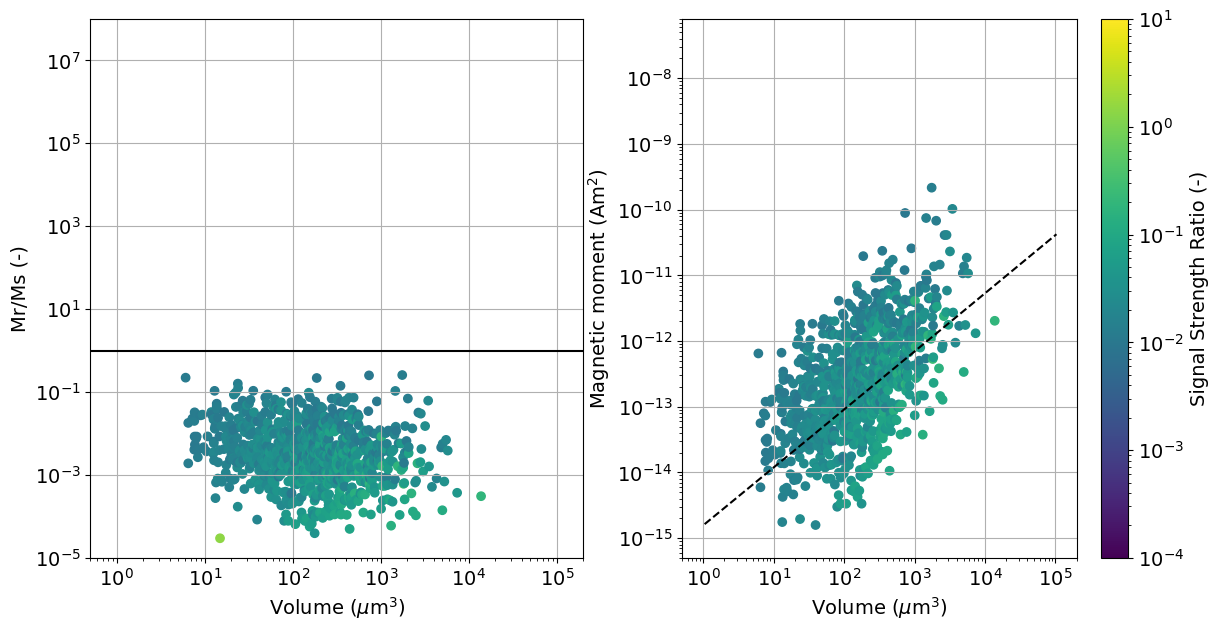

In [23]:
def mag_max(diam, d_0=1):
    mag = np.zeros(len(diam))
    for i, dia in enumerate(diam):
        if dia >= d_0:
            mag[i] = 1500 * dia**(-0.33)
        else:
            mag[i] = 1500 * dia**(-1.20)
    return mag

def mag_min(diam, d_0=1):
    mag = np.zeros(len(diam))
    for i, dia in enumerate(diam):
        if dia >= d_0:
            mag[i] = 400 * dia**(-0.62)
        else:
            mag[i] = 400 * dia**(-1.04)
    return mag

# plot of individual mr/ms and mr
Ms = 480e3
cmap = mpl.cm.viridis
mpl.rcParams.update({'font.size': 14})
diam_range = np.logspace(0.1, np.cbrt(5.5))
vol_range = 4/3*np.pi * (diam_range*1e-6/2)**3

top_f = np.linalg.norm(magmom[:, :3], axis=1)
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].set_ylabel('Mr/Ms (-)')
ax[0].set_xlabel('Volume ($\mu$m$^3$)')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-5, 1e8)
ax[0].set_xlim(0.5, 2e5)
ax[0].hlines(xmin=0.1, xmax=1e6, y=1, color='black')
ax[0].scatter(z_vol_nr[:, 1]*1e18, top_f / z_vol_nr[:, 1] / Ms, c=sel_ssr, norm=LogNorm(vmin=1e-4, vmax=1e1))
ax[0].grid(True)

ax[1].set_ylabel('Magnetic moment (Am$^2$)')
ax[1].set_xlabel('Volume ($\mu$m$^3$)')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(5e-16, 8e-8)
ax[1].set_xlim(0.5, 2e5)
c = ax[1].scatter(z_vol_nr[:, 1]*1e18, top_f, c=sel_ssr, norm=LogNorm(vmin=1e-4, vmax=1e1))
ax[1].grid(True)
ax[1].plot(vol_range*1e18, (mag_max(diam_range) + mag_min(diam_range) / 2) * vol_range, linestyle='--', color='black')

plt.colorbar(c, label='Signal Strength Ratio (-)')
# plt.savefig(imagepath / f'{subpath}/ssr_mrms_magmom_dip.jpeg')
plt.show()

In [35]:
# function for stereoplot and zijderveld
# figure set-up
def stereoplot(figsize=(20/2.54, 13/2.54)):
    cm = 1/2.54
    linewidth = 1
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=figsize)
    ax.axis("square")
    ax.set_theta_zero_location('N') ## Zorgt ervoor dat Noord naar Noord wijst
    ax.set_theta_direction(-1)  ## Zorgt ervoor dat we met de klok mee gaan
    circle = np.radians(np.arange(0, 361)) # maakt de waardes voor de buitencirkel
    ax.plot(circle, np.zeros(len(circle)), 'k', linewidth=linewidth) # plot de buitencirkel
    circle_tick = np.tile(np.radians(np.arange(0, 360, 10)), (4, 1)) # Maakt de lijntjes voor de elke 10 graden
    dec_tick = np.tile(np.arange(4), (36, 1)).T
    ax.plot(circle_tick, dec_tick, 'k', linewidth=linewidth)
    ## Maakt de lijn van plusjes van 0 naar 180 en van 270 naar 90
    plus_line = np.arange(10, 100, 10)
    ax.plot(np.zeros(len(plus_line)), plus_line, 'k+', markersize=4, markeredgewidth=linewidth)
    ax.plot(np.zeros(len(plus_line))+np.pi, plus_line, 'k+', markersize=4, markeredgewidth=linewidth)
    ax.plot(np.zeros(len(plus_line))+0.5*np.pi, plus_line, 'k+', markersize=4, markeredgewidth=linewidth)
    ax.plot(np.zeros(len(plus_line))-0.5*np.pi, plus_line, 'k+', markersize=4, markeredgewidth=linewidth)
    ax.set_ylim(90, 0)
    ax.axis("off")
    return fig, ax

def zijderveld(plot_mag, figsize=(5, 4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('equal')
    ax.set_xlabel('East / H')
    ax.set_ylabel('North / Up')
    ax.axis('equal')
    ax.set_xlabel('East / H')
    ax.set_ylabel('North / Up')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.grid()

    ax.plot(plot_mag[:, 1], plot_mag[:, 0], marker='o', label='XY.')
    ax.scatter(plot_mag[0, 1], plot_mag[0, 0], marker='s', label='NRM', color='black', zorder=2)
    ax.plot(np.linalg.norm(plot_mag[:, :2], axis=1), plot_mag[:, 2]*-1, marker='o', label='HZ')
    ax.scatter(np.linalg.norm(plot_mag[0, :2]), plot_mag[0, 2]*-1, marker='s', color='black', zorder=2)
    plt.legend()
    return fig, ax

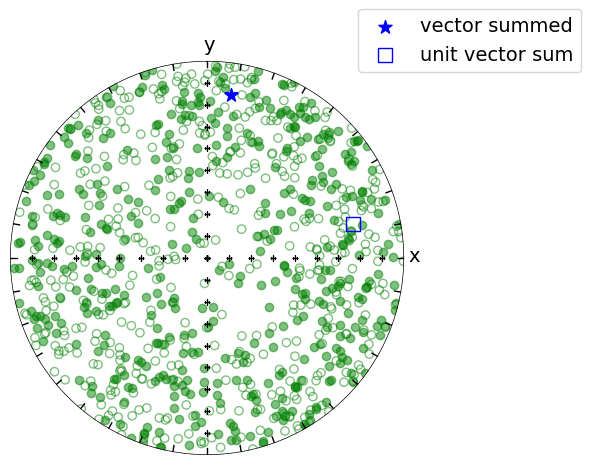

In [58]:
# plot stereoplot
ds_decinc = np.zeros((len(diam), 3))
ds_decinc[:, 0] = np.degrees(np.arctan2(magmom[:, 0], magmom[:, 1]))
ds_f = np.linalg.norm(magmom[:, :3], axis=1)
ds_decinc[:, 1] = np.degrees(np.arcsin(magmom[:, 2] / ds_f))
ds_decinc[:, 2] = ds_f
ds_sum = np.zeros(3)
ds_sum2 = np.zeros(3)
sel_data = magmom[:, :3].sum(axis=0)
magmom2 = magmom[:, :3] / ds_f[:, np.newaxis]
sel2_data = magmom2.sum(axis=0)
ds_fsum = np.linalg.norm(sel_data)
ds2_fsum = np.linalg.norm(sel2_data)
ds_sum[0] = np.degrees(np.arctan2(sel_data[0], sel_data[1]))
ds_sum[1] = np.degrees(np.arcsin(sel_data[2] / ds_fsum))
ds_sum[2] = ds_fsum
ds_sum2[0] = np.degrees(np.arctan2(sel2_data[0], sel2_data[1]))
ds_sum2[1] = np.degrees(np.arcsin(sel2_data[2] / ds2_fsum))
ds_sum2[2] = ds2_fsum
up_idx = np.argwhere(ds_decinc[:, 1] >= 0).flatten()
down_idx = np.argwhere(ds_decinc[:, 1] < 0).flatten()

# figure set-up
fig, ax = stereoplot()
ax.text(np.radians(-1), -5, 'y')
ax.text(np.radians(91), -2, 'x')
# start plotting data
ax.scatter(np.radians(ds_decinc[up_idx, 0]), ds_decinc[up_idx, 1], facecolor='green', edgecolor='green', alpha=0.5)
ax.scatter(np.radians(ds_decinc[down_idx, 0]), abs(ds_decinc[down_idx, 1]), facecolor='none', edgecolor='green', alpha=0.5)
if ds_sum[1] >= 0:
    ax.scatter(np.radians(ds_sum[0]), ds_sum[1], facecolor='blue', edgecolor='blue', marker='*', s=100, label='vector summed')
else:
    ax.scatter(np.radians(ds_sum[0]), ds_sum[1]*-1, facecolor='none', edgecolor='blue', marker='*', s=100, label='vector summed')
if ds_sum2[1] >= 0:
    ax.scatter(np.radians(ds_sum2[0]), ds_sum2[1], facecolor='blue', edgecolor='blue', marker='s', s=100, label='unit vector sum')
else:
    ax.scatter(np.radians(ds_sum2[0]), ds_sum2[1]*-1, facecolor='none', edgecolor='blue', marker='s', s=100, label='unit vector sum')

fig.legend(loc='upper right')
# plt.savefig(imagepath / f'{subpath}/stereoplot.jpeg')
plt.show()

## Combination plot of intensity and direction of thermal/AF/IRM steps
If you have done a series of measurements, you can plot the summed vector results together here. Change `f_list` to whatever folder structure you have. Remember that this folder structure should be found one step under your `path` variable!

In [10]:
# first find grains present in all scans
count_idx = np.zeros(10000)

for i in range(len(subpaths)):
    idx = np.loadtxt(datapath / f'{subpaths[i]}/stable_moments.txt')[:, -1].astype(int)
    count_idx[idx] += 1

match_idx = np.argwhere(count_idx == len(subpaths)).flatten()
print(f'We have found {len(match_idx)} matches in each step')

We have found 815 matches in each step


We can plot the summed moments over all experiments (```grain_nr = -1```) or choose to plot results for one grain (```grain_nr = 2248```, e.g.). For the summed moments, you can choose to normalize the vectors before summing (```normalize=True```) or not (```normalize=False```).

To plot one of the individual grains, choose one of the grain numbers present in all subdomains. See the following list:

In [42]:
print(match_idx)

[1503 1558 1616 1673 1702 1754 1779 1783 1784 1788 1791 1806 1816 1820
 1830 1837 1839 1847 1860 1865 1882 1910 1931 1933 1947 1981 2008 2010
 2013 2014 2019 2023 2051 2060 2073 2074 2082 2089 2097 2103 2105 2107
 2113 2127 2132 2136 2146 2151 2157 2160 2163 2171 2172 2184 2186 2195
 2196 2199 2201 2228 2229 2240 2242 2248 2249 2268 2270 2279 2289 2291
 2303 2307 2318 2324 2337 2350 2352 2383 2387 2395 2403 2408 2418 2430
 2439 2449 2450 2464 2475 2476 2485 2488 2492 2502 2503 2506 2507 2508
 2509 2520 2529 2531 2533 2538 2561 2572 2586 2594 2596 2634 2637 2654
 2655 2672 2673 2677 2679 2688 2692 2701 2703 2723 2726 2729 2733 2734
 2740 2749 2754 2756 2760 2778 2781 2783 2788 2789 2793 2811 2823 2838
 2848 2850 2854 2856 2864 2869 2870 2872 2879 2889 2895 2901 2906 2910
 2916 2922 2924 2925 2931 2935 2942 2947 2954 2958 2961 2964 2970 2975
 2979 2980 2992 3009 3012 3027 3033 3038 3040 3041 3046 3049 3051 3056
 3068 3072 3082 3083 3085 3089 3098 3111 3113 3122 3135 3145 3151 3153
 3161 

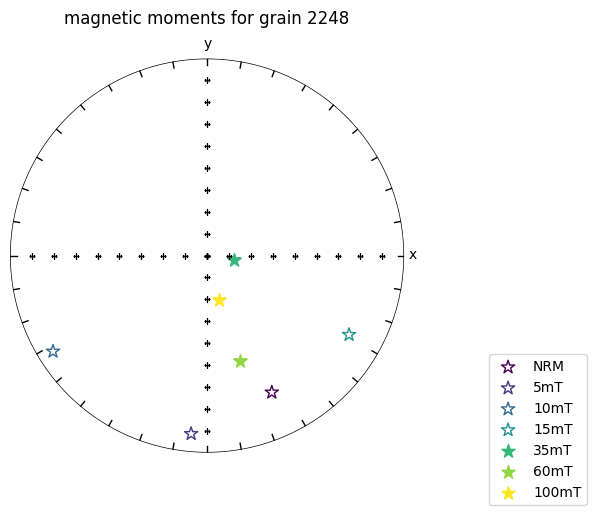

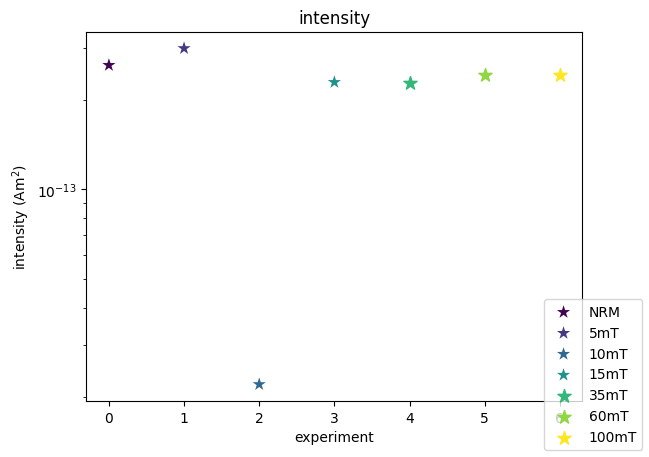

In [47]:
normalize = False # set to True if you want to normalize 'bulk' magnetic moments
grain_nr = 2248 # or set to -1 to sum all magnetic moment

# plot stereoplot
ds_sum = np.zeros((len(subpaths), 3))

color = plt.cm.viridis(np.linspace(0, 1, len(subpaths)))
# figure set-up
fig2, ax2 = stereoplot()
ax2.text(np.radians(-1), -5, 'y')
ax2.text(np.radians(91), -2, 'x')

if not normalize or grain_nr != -1:
    fig3, ax3 = plt.subplots()
    ax3.set_title('intensity')
    # ax3.set_ylim(1e-11, 1e-9)
    ax3.set_yscale('log')
    ax3.set_ylabel('intensity (Am$^2$)')
    ax3.set_xlabel('experiment')

if grain_nr == -1:
    idx = match_idx
    if normalize:
        ax2.set_title('normalized summed magnetic moments')
    else:
        ax2.set_title('summed magnetic moments')
else:
    ax2.set_title(f'magnetic moments for grain {grain_nr}')
    idx = grain_nr
    assert any(np.isin(match_idx, grain_nr)), f'grain {grain_nr} not found'

for f, folder in enumerate(subpaths):
    all_data = np.loadtxt(datapath / f'{folder}/stable_moments.txt')
    magmom = all_data[np.argwhere(np.isin(all_data[:, -1], idx)).flatten()]
    if normalize and grain_nr == -1:
        magmom[:, :3] /= np.linalg.norm(magmom[:, :3], axis=1)[:, np.newaxis]
    sel_data = magmom[:, :3].sum(axis=0)
    ds_fsum = np.linalg.norm(sel_data)
    ds_sum[f, 0] = np.degrees(np.arctan2(sel_data[0], sel_data[1]))
    ds_sum[f, 1] = np.degrees(np.arcsin(sel_data[2] / ds_fsum))
    ds_sum[f, 2] = ds_fsum

    if ds_sum[f, 1] >= 0:
        ax2.scatter(np.radians(ds_sum[f, 0]), ds_sum[f, 1], facecolor=color[f], edgecolor=color[f], marker='*', s=100, label=folder)
        if not normalize or grain_nr != -1:
            ax3.scatter(f, ds_sum[f, 2], facecolor=color[f], edgecolor=color[f], marker='*', s=100, label=folder)
    else:
        ax2.scatter(np.radians(ds_sum[f, 0]), ds_sum[f, 1]*-1, facecolor='none', edgecolor=color[f], marker='*', s=100, label=folder)
        if not normalize or grain_nr != -1:
            ax3.scatter(f, ds_sum[f, 2], facecolor=color[f], edgecolor='none', marker='*', s=100, label=folder)

fig2.legend(loc='lower right')
# fig2.savefig(imagepath / f'stereoplot_{grain_nr}_dip.jpeg')
if not normalize or grain_nr != -1:
    fig3.legend(loc='lower right')
    # fig3.savefig(imagepath / f'intensity_{grain_nr}_dip.jpeg')
plt.show()

## Rotate Results
Here we provide a function that takes mx, my, mz (either one column of size 3 or a NX3 array) as input and transforms that to global inclination, declination, and intensity. To do this we need the angle between North and the sampling direction ('declination'; dec), the plunge (measured wrt horizontal; plu), and angle from QDM scan x-axis to feather (counterclockwise is positive; qdm). All angles should be inputted in degrees! You can choose if you want to obtain declination, inclination, and intensity (``return_dif=True``), or mx, my, mz (``return_dif=False``, default). Furthermore, you can choose whether to obtain individually rotated results (``return_bulk=False``, default), or the summed results (``return_bulk=True``). Last, you **have to** choose whether the imaged side of the thin section is mirrored wrt drill core surface closest to drill (``mirror=True``, default), or not (``mirror=False``).

In [71]:
def qdm_to_global(magmom: np.ndarray,
                  dec: float, plu: float, qdm: float,
                  return_dif = False, return_bulk = False,
                  mirror=True):
    if magmom.ndim == 1:
        magmom = magmom[np.newaxis, :]
    assert len(magmom[0]) == 3, 'magmom needs three columns for mx, my, mz'
    cdec = np.cos(np.radians(dec))
    sdec = np.sin(np.radians(dec))
    cplu = np.cos(np.radians(plu))
    splu = np.sin(np.radians(plu))
    cqdm = np.cos(np.radians(qdm))
    sqdm = np.sin(np.radians(qdm))
    if mirror:
        pm = +1
    else:
        pm = -1

    rot_mat = np.array([[cdec*splu*cqdm + pm*sdec*sqdm, cdec*splu*sqdm - pm*sdec*cqdm, pm*cdec*cplu],
                         [sdec*splu*cqdm - pm*cdec*sqdm, sdec*splu*sqdm + pm*cdec*cqdm, pm*sdec*cplu],
                         [-cplu*cqdm, -cplu*sqdm, pm*splu]])
    assert abs(np.linalg.det(rot_mat) - 1) < 1e-12, 'rotation matrix not orthogonal! Fatal failure'
    r_magmom = np.matmul(rot_mat, magmom.T).T

    if return_bulk:
        bulk = np.sum(r_magmom, axis=0)
        r_magmom = bulk

    if return_dif:
        dif = np.zeros_like(r_magmom)
        dif[:, 2] = np.linalg.norm(r_magmom, axis=1)[np.newaxis, :].flatten()
        dif[:, 1] = np.degrees(np.arctan2(r_magmom[:, 2].T, np.linalg.norm(r_magmom[:, :2], axis=1))).flatten()
        dif[:, 0] = np.degrees(np.arctan2(r_magmom[:, 1], r_magmom[:, 0])).flatten()
        r_magmom = dif

    return r_magmom

In [72]:
# provide here the required angles
dec = 326.5
plu = 0
qdm = 131

In [73]:
# we rotate all moments and calculate bulk, normalize bulk if needed
rot_match_moments = np.zeros((len(subpaths), len(match_idx), 3))
rot_bulk_moments = np.zeros((len(subpaths), 3))
rot_bulk_moments_norm = np.zeros((len(subpaths), 3))

for i in range(len(subpaths)):
    all_data = np.loadtxt(datapath / f'{subpaths[i]}/stable_moments.txt')
    magmoms = all_data[np.argwhere(np.isin(all_data[:, -1], match_idx)).flatten(), :3]
    magmoms_norm = magmoms[:, :3] / np.linalg.norm(magmoms[:, :3], axis=1)[:, np.newaxis]
    rot_match_moments[i] = qdm_to_global(magmoms, dec, plu, qdm)
    rot_bulk_moments[i] = qdm_to_global(magmoms, dec, plu, qdm, return_bulk=True)
    rot_bulk_moments_norm[i] = qdm_to_global(magmoms_norm, dec, plu, qdm, return_bulk=True)

Plot of corrected inclination and declination. bulk signal is composed by summing individual magnetic moments or not (choose normalize is True or False).
You can also plot individual results. Set grain_nr to corresponding number. For bulk set to -1

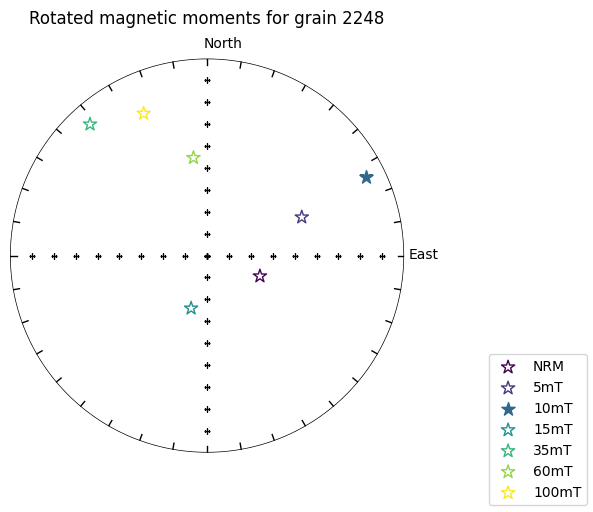

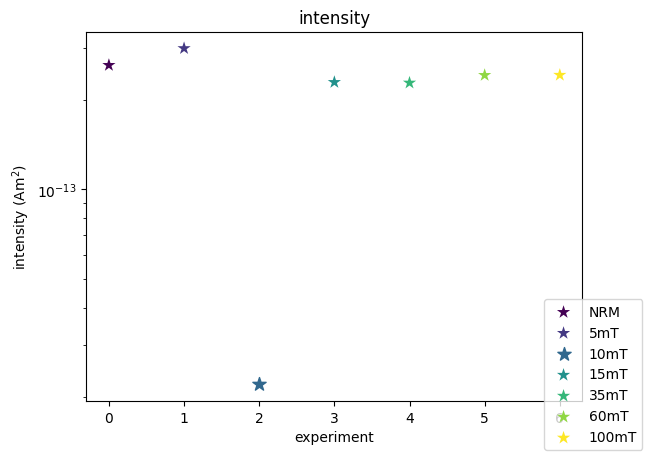

In [83]:
normalize = False # set to true to normalize 'bulk' magnetic moments
grain_nr = 2248 # or set to -1 to sum all magnetic moment

# plot stereoplot
ds_sum = np.zeros((len(subpaths), 3))

color = plt.cm.viridis(np.linspace(0, 1, len(subpaths)))
# figure set-up
fig2, ax2 = stereoplot()
ax2.text(np.radians(-1), -5, 'North')
ax2.text(np.radians(91), -2, 'East')

if not normalize or grain_nr != -1:
    fig3, ax3 = plt.subplots()
    ax3.set_title('intensity')
    # ax3.set_ylim(1e-11, 1e-9)
    ax3.set_yscale('log')
    ax3.set_ylabel('intensity (Am$^2$)')
    ax3.set_xlabel('experiment')

if normalize and grain_nr == -1:
    ax2.set_title('Rotated normalized summed magnetic moments')
    sel_data = rot_bulk_moments_norm
elif grain_nr != -1:
    ax2.set_title(f'Rotated magnetic moments for grain {grain_nr}')
    sel_data = np.squeeze(rot_match_moments[:, np.where(grain_nr == match_idx)[0]])
else:
    ax2.set_title('Rotated summed magnetic moments')
    sel_data = rot_bulk_moments

ds_fsum = np.linalg.norm(sel_data, axis=1)
ds_sum[:, 0] = np.degrees(np.arctan2(sel_data[:, 1], sel_data[:, 0]))
ds_sum[:, 1] = np.degrees(np.arcsin(sel_data[:, 2] / ds_fsum))
ds_sum[:, 2] = ds_fsum

for f, folder in enumerate(subpaths):
    if ds_sum[f, 1] <= 0:
        ax2.scatter(np.radians(ds_sum[f, 0]), ds_sum[f, 1]*-1, facecolor=color[f], edgecolor=color[f], marker='*', s=100, label=folder)
        if not normalize or grain_nr != -1:
            ax3.scatter(f, ds_sum[f, 2], facecolor=color[f], edgecolor=color[f], marker='*', s=100, label=folder)
    else:
        ax2.scatter(np.radians(ds_sum[f, 0]), ds_sum[f, 1], facecolor='none', edgecolor=color[f], marker='*', s=100, label=folder)
        if not normalize or grain_nr != -1:
            ax3.scatter(f, ds_sum[f, 2], facecolor=color[f], edgecolor='none', marker='*', s=100, label=folder)

fig2.legend(loc='lower right')
# fig2.savefig(imagepath / f'stereoplot_{grain_nr}_dip_rotated.jpeg')
if not normalize or grain_nr != -1:
    fig3.legend(loc='lower right')
    # fig3.savefig(imagepath / f'intensity_{grain_nr}_dip_rotated.jpeg')
plt.show()

Now we will construct a bulk zijderveld diagram of for individual grains with the grain_nr parameter

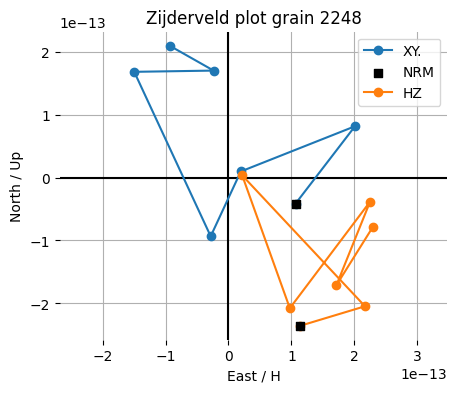

In [80]:
# zijderveld bulk
grain_nr = 2248

if grain_nr == -1:
    fig, ax = zijderveld(rot_bulk_moments)
    ax.set_title('Zijderveld plot summed magnetic moments')
else:
    fig, ax = zijderveld(np.squeeze(rot_match_moments[:, np.where(grain_nr == match_idx)[0]]))
    ax.set_title(f'Zijderveld plot grain {grain_nr}')

plt.show()